In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal

In [11]:
def load_and_label(filepath: str, country_name: str) -> pd.DataFrame:
    """
    Loads a cleaned solar dataset CSV file and adds a 'Country' column.

    Parameters:
        filepath (str): Path to the cleaned CSV file.
        country_name (str): Name of the country for labeling.

    Returns:
        pd.DataFrame: DataFrame with solar data and country label.
    """
    df = pd.read_csv(filepath)
    df['Country'] = country_name
    return df

In [12]:
# Load and label data for each country
benin = load_and_label("/home/zumi/Documents/Kifiya training/Week 0/Resources/data/benin_clean.csv", "Benin")
togo = load_and_label("/home/zumi/Documents/Kifiya training/Week 0/Resources/data/togo_clean.csv", "Togo")
sierraleone = load_and_label("/home/zumi/Documents/Kifiya training/Week 0/Resources/data/sierraleone-clean.csv", "Sierraleone")

# Combine all into one DataFrame
df_all = pd.concat([benin, togo, sierraleone], ignore_index=True)

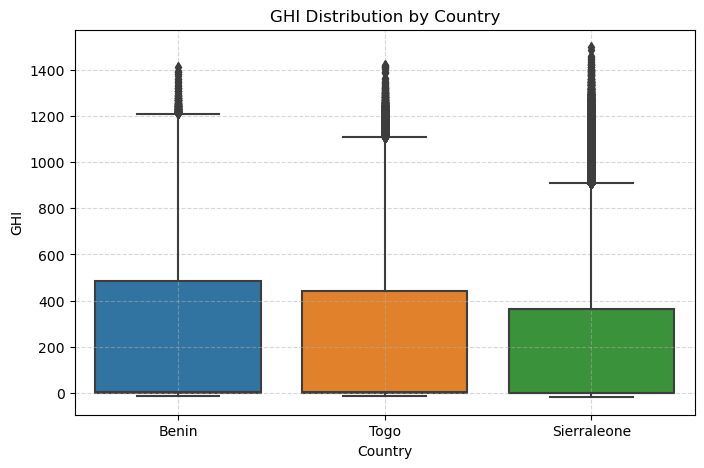

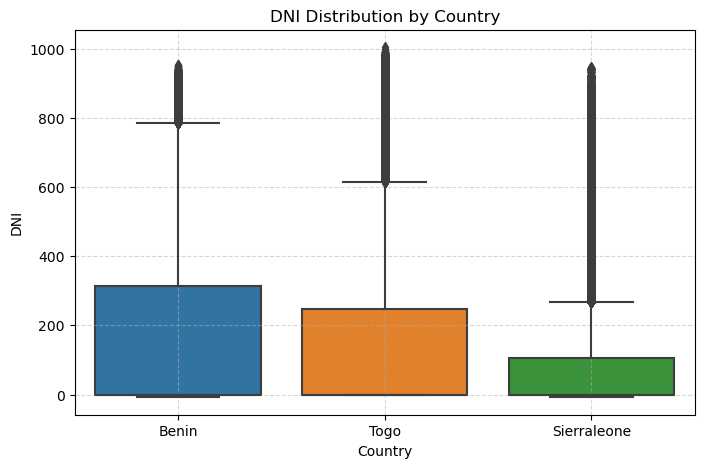

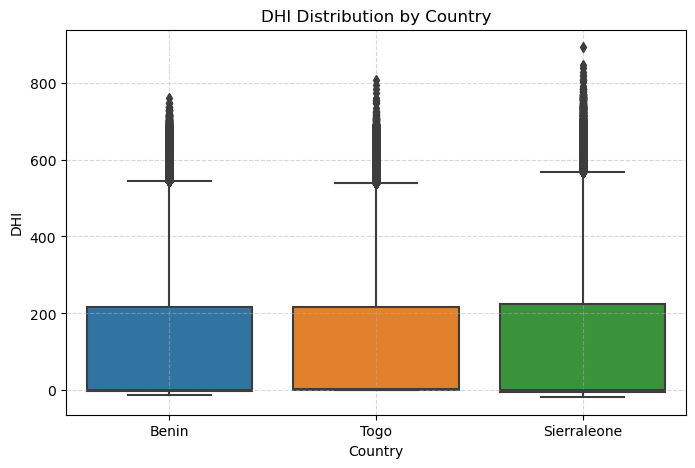

In [13]:
def plot_metric_boxplots(df: pd.DataFrame, metrics: list) -> None:
    """
    Creates boxplots for specified metrics, grouped by country.

    Parameters:
        df (pd.DataFrame): The combined dataset containing all countries.
        metrics (list): List of metric column names (e.g., ['GHI', 'DNI']).
    """
    for metric in metrics:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Country', y=metric, data=df)
        plt.title(f'{metric} Distribution by Country')
        plt.ylabel(metric)
        plt.xlabel('Country')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

# Define metrics to compare
metrics_to_compare = ['GHI', 'DNI', 'DHI']

# Plot boxplots
plot_metric_boxplots(df_all, metrics_to_compare)

In [14]:
def generate_summary_table(df: pd.DataFrame, metrics: list) -> pd.DataFrame:
    """
    Generates a summary table (mean, median, std) for selected metrics by country.

    Parameters:
        df (pd.DataFrame): The combined dataset.
        metrics (list): List of metrics to summarize.

    Returns:
        pd.DataFrame: Multi-index summary table.
    """
    summary = df.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
    return summary.round(2)

# Create summary table
summary_table = generate_summary_table(df_all, metrics_to_compare)
summary_table

GHI                    DNI                    DHI         \
               mean median     std    mean median     std    mean median   
Country                                                                    
Benin        240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierraleone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo         230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                     
                std  
Country              
Benin        158.69  
Sierraleone  158.95  
Togo         156.52

In [15]:
def run_statistical_tests(*groups) -> dict:
    """
    Runs ANOVA and Kruskal-Wallis tests on multiple groups.

    Parameters:
        *groups: Variable number of numerical arrays (e.g., GHI values for each country).

    Returns:
        dict: Dictionary containing p-values from ANOVA and Kruskal-Wallis tests.
    """
    anova_p = f_oneway(*groups).pvalue
    kruskal_p = kruskal(*groups).pvalue
    return {
        "ANOVA p-value": round(anova_p, 4),
        "Kruskal-Wallis p-value": round(kruskal_p, 4)
    }

# Prepare inputs
ghi_benin = benin['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()
ghi_sierra = sierraleone['GHI'].dropna()

# Run tests
p_values = run_statistical_tests(ghi_benin, ghi_togo, ghi_sierra)
print(p_values)

{'ANOVA p-value': 0.0, 'Kruskal-Wallis p-value': 0.0}


### Key Observations

- **Benin** has the highest average GHI (240.56 W/m²) and the greatest variability (std = 331.13), making it a high-potential but more volatile solar environment.
- **Togo** shows the highest median GHI (2.1) and relatively high consistency across GHI and DHI, indicating stable daytime solar exposure.
- **Sierra Leone** has the lowest average and median GHI and DNI, suggesting lower direct solar potential, but shows comparable DHI variability to other countries, likely due to cloudier atmospheric conditions.


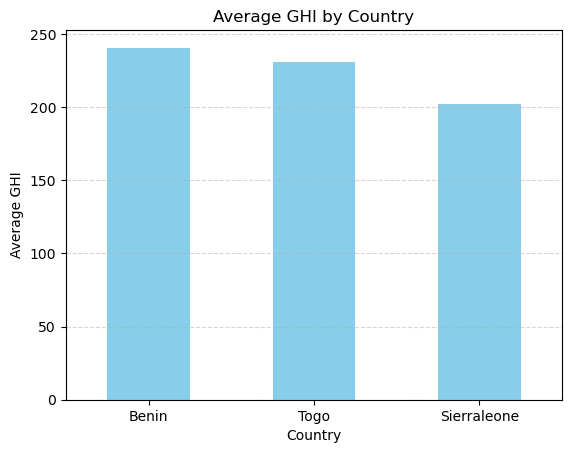

In [16]:
def plot_average_metric(df: pd.DataFrame, metric: str) -> None:
    """
    Plots a bar chart ranking countries by the average value of a given metric.

    Parameters:
        df (pd.DataFrame): Combined dataset.
        metric (str): The metric column to average and plot.
    """
    avg_values = df.groupby("Country")[metric].mean().sort_values(ascending=False)
    avg_values.plot(kind='bar', color='skyblue', title=f'Average {metric} by Country')
    plt.ylabel(f"Average {metric}")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

# Plot ranking by average GHI
plot_average_metric(df_all, "GHI")